In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
web_marks = pd.read_csv("web_marks.csv")

In [6]:
web_marks

,enrollment_number,student_name,internal_marks_web,external_marks_web,total_marks_web,result_web
0,1KG16CS025,DIVYA R D,27,5,32,FAIL
1,1KG16CS054,M D MAHATAP PASHA,34,33,67,PASS
2,1KG16CS059,P YASHWANTH,20,15,35,FAIL
3,1KG16CS113,V CHANDANA CHOWDARY,30,24,54,PASS
4,1KG17CS002,ABHIMANYU BANSAL,39,21,60,PASS
...,...,...,...,...,...,...
90,1KG17CS106,VIKAS B,36,25,61,PASS
91,1KG17CS107,VINITH RAJ B U,30,22,52,PASS
92,1KG17CS108,VINOD N,30,30,60,PASS
93,1KG17CS109,YASH KUMAR SINGH PATWA,39,29,68,PASS


In [7]:
web_marks.head()

,enrollment_number,student_name,internal_marks_web,external_marks_web,total_marks_web,result_web
0,1KG16CS025,DIVYA R D,27,5,32,FAIL
1,1KG16CS054,M D MAHATAP PASHA,34,33,67,PASS
2,1KG16CS059,P YASHWANTH,20,15,35,FAIL
3,1KG16CS113,V CHANDANA CHOWDARY,30,24,54,PASS
4,1KG17CS002,ABHIMANYU BANSAL,39,21,60,PASS


In [8]:
web_marks.tail()

,enrollment_number,student_name,internal_marks_web,external_marks_web,total_marks_web,result_web
90,1KG17CS106,VIKAS B,36,25,61,PASS
91,1KG17CS107,VINITH RAJ B U,30,22,52,PASS
92,1KG17CS108,VINOD N,30,30,60,PASS
93,1KG17CS109,YASH KUMAR SINGH PATWA,39,29,68,PASS
94,1KG17CS110,YASHASH T V,33,38,71,PASS


In [9]:
web_marks.shape

(95, 6)

In [10]:
web_marks.columns

Index(['enrollment_number', 'student_name', 'internal_marks_web',
       'external_marks_web', 'total_marks_web', 'result_web'],
      dtype='object')

In [11]:
web_marks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   enrollment_number   95 non-null     object
 1   student_name        95 non-null     object
 2   internal_marks_web  95 non-null     int64 
 3   external_marks_web  95 non-null     int64 
 4   total_marks_web     95 non-null     int64 
 5   result_web          95 non-null     object
dtypes: int64(3), object(3)
memory usage: 4.6+ KB


In [12]:
web_marks.describe()

,internal_marks_web,external_marks_web,total_marks_web
count,95.000000,95.000000,95.000000
mean,34.505263,31.842105,66.347368
std,3.861633,10.871900,13.032503
min,20.000000,0.000000,32.000000
25%,32.000000,24.000000,59.000000
50%,35.000000,32.000000,66.000000
75%,37.000000,38.500000,75.500000
max,40.000000,55.000000,92.000000


In [13]:
web_marks.isnull().sum()

enrollment_number     0
student_name          0
internal_marks_web    0
external_marks_web    0
total_marks_web       0
result_web            0
dtype: int64

In [14]:
web_marks.result_web.unique()

array(['FAIL', 'PASS'], dtype=object)

In [15]:
web_marks.result_web.value_counts()

PASS    87
FAIL     8
Name: result_web, dtype: int64

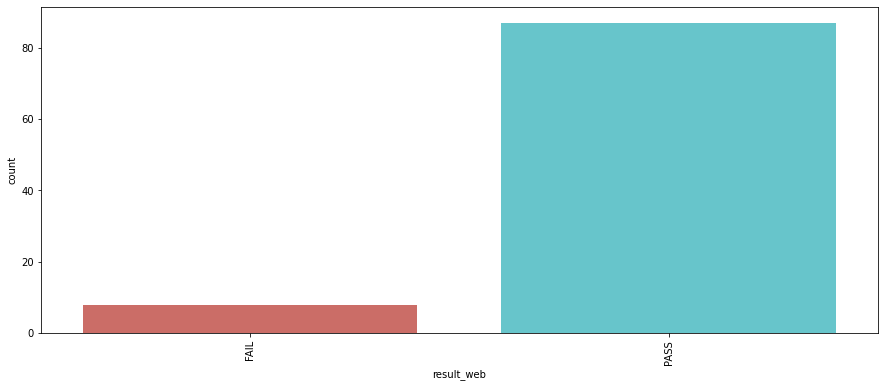

In [16]:
plt.figure(figsize=(15,6))
sns.countplot('result_web', data = web_marks, palette='hls')
plt.xticks(rotation = 90)
plt.show()

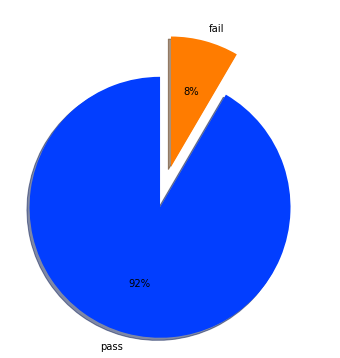

In [17]:
plt.figure(figsize=(15,6))
colors = sns.color_palette('bright')
explode = [0.3, 0.02]
plt.pie(web_marks['result_web'].value_counts(), colors = colors, labels = ['pass', 'fail'],
        explode = explode, autopct = '%0.0f%%', shadow = 'True', startangle = 90)
plt.show()

In [18]:
web_marks['percentage'] = web_marks['total_marks_web'].div(100).round(2)

In [19]:
conditions = [
    (web_marks['percentage'] > 0.7),
    (web_marks['percentage'] >= 0.5) & (web_marks['percentage'] < 0.69),
    (web_marks['percentage'] >= 0.35) & (web_marks['percentage'] < 0.49),
    (web_marks['percentage'] < 0.35)
]

values = [0, 1, 2, 3]

web_marks['time_per_day'] = np.select(conditions, values)


In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()

In [22]:
data1 = ['result_web']
for i in data1:
    web_marks[i] = le.fit_transform(web_marks[i])

In [23]:
web_marks.head()

,enrollment_number,student_name,internal_marks_web,external_marks_web,total_marks_web,result_web,percentage,time_per_day
0,1KG16CS025,DIVYA R D,27,5,32,0,0.32,3
1,1KG16CS054,M D MAHATAP PASHA,34,33,67,1,0.67,1
2,1KG16CS059,P YASHWANTH,20,15,35,0,0.35,2
3,1KG16CS113,V CHANDANA CHOWDARY,30,24,54,1,0.54,1
4,1KG17CS002,ABHIMANYU BANSAL,39,21,60,1,0.60,1


In [24]:
web_marks.tail()

,enrollment_number,student_name,internal_marks_web,external_marks_web,total_marks_web,result_web,percentage,time_per_day
90,1KG17CS106,VIKAS B,36,25,61,1,0.61,1
91,1KG17CS107,VINITH RAJ B U,30,22,52,1,0.52,1
92,1KG17CS108,VINOD N,30,30,60,1,0.60,1
93,1KG17CS109,YASH KUMAR SINGH PATWA,39,29,68,1,0.68,1
94,1KG17CS110,YASHASH T V,33,38,71,1,0.71,0


In [25]:
x_web= web_marks.drop(['enrollment_number', 'student_name', 'total_marks_web',
                   'time_per_day', 'result_web', 'internal_marks_web',
                   'external_marks_web'], axis = 1)  
y_web= web_marks['time_per_day']

In [26]:
x_train_web = x_web.iloc[:75]

In [27]:
y_train_web = y_web.iloc[:75]

In [28]:
x_test_web = x_web.iloc[75:96]

In [29]:
y_test_web = y_web.iloc[75:96]

In [30]:
from sklearn.svm import SVR

In [31]:
svregressor = SVR(kernel = 'rbf')
svregressor.fit(x_train_web, y_train_web)

SVR()

In [32]:
y_pred_sv= svregressor.predict(x_test_web) 

In [33]:
print("Training Accuracy :", svregressor.score(x_train_web, y_train_web))
print("Testing Accuracy :", svregressor.score(x_test_web, y_test_web))

Training Accuracy : 0.8858053307339643
Testing Accuracy : 0.7916849711695223


In [34]:
from sklearn.linear_model import LinearRegression  

In [35]:
liregressor= LinearRegression()  
liregressor.fit(x_train_web, y_train_web) 

LinearRegression()

In [36]:
y_pred_li= liregressor.predict(x_test_web) 

In [37]:
print("Training Accuracy :", liregressor.score(x_train_web, y_train_web))
print("Testing Accuracy :", liregressor.score(x_test_web, y_test_web))

Training Accuracy : 0.7502629008683017
Testing Accuracy : 0.7504322018238113


In [38]:
from sklearn.linear_model import LogisticRegression 

In [39]:
loregressor= LogisticRegression()  
loregressor.fit(x_train_web, y_train_web)

LogisticRegression()

In [40]:
y_pred_lo= loregressor.predict(x_test_web) 

In [41]:
print("Training Accuracy :", loregressor.score(x_train_web, y_train_web))
print("Testing Accuracy :", loregressor.score(x_test_web, y_test_web))

Training Accuracy : 0.7733333333333333
Testing Accuracy : 0.7


In [42]:
from sklearn.tree import DecisionTreeRegressor  

In [43]:
dtregressor= DecisionTreeRegressor()  
dtregressor.fit(x_train_web, y_train_web) 

DecisionTreeRegressor()

In [44]:
y_pred_dt= dtregressor.predict(x_test_web) 

In [45]:
print("Training Accuracy :", dtregressor.score(x_train_web, y_train_web))
print("Testing Accuracy :", dtregressor.score(x_test_web, y_test_web))

Training Accuracy : 1.0
Testing Accuracy : 1.0


In [46]:
from sklearn.ensemble import RandomForestRegressor  

In [47]:
rfregressor= RandomForestRegressor()  
rfregressor.fit(x_train_web, y_train_web)

RandomForestRegressor()

In [48]:
print("Training Accuracy :", rfregressor.score(x_train_web, y_train_web))
print("Testing Accuracy :", rfregressor.score(x_test_web, y_test_web))

Training Accuracy : 0.9851354089904201
Testing Accuracy : 0.9430833333333333


In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
cross_val_score(SVR(),x_web, y_web, cv = 3)

array([0.78336486, 0.92124746, 0.80697611])

In [51]:
cross_val_score(LinearRegression(),x_web, y_web, cv = 3)

array([0.69826236, 0.69381992, 0.75581806])

In [52]:
cross_val_score(LogisticRegression(),x_web, y_web, cv = 3)

array([0.875     , 0.875     , 0.83870968])

In [53]:
from xgboost import XGBRegressor

In [54]:
cross_val_score(XGBRegressor(),x_web, y_web, cv = 3)

array([0.8711437 , 0.99999993, 0.41992341])

In [55]:
cross_val_score(DecisionTreeRegressor(),x_web, y_web, cv = 3)

array([0.87096774, 1.        , 0.67708333])

In [56]:
cross_val_score(RandomForestRegressor(),x_web, y_web, cv = 3)

array([0.89407742, 0.99763344, 0.80564292])

In [57]:
def time_predict_web(percentage):
    x=np.zeros(len(x_web.columns))
    x[0]=percentage
    return svregressor.predict([x])[0]

In [58]:
time_predict_web(0.55)

0.9778651752803509

In [59]:
def time_predict_web(percentage):
    x=np.zeros(len(x_web.columns))
    x[0]=percentage
    return liregressor.predict([x])[0]

In [60]:
time_predict_web(0.55)

1.1485281541394055

In [61]:
def time_predict_web(percentage):
    x=np.zeros(len(x_web.columns))
    x[0]=percentage
    return loregressor.predict([x])[0]

In [62]:
time_predict_web(0.55)

1

In [63]:
def time_predict_web(percentage):
    x=np.zeros(len(x_web.columns))
    x[0]=percentage
    return dtregressor.predict([x])[0]

In [64]:
time_predict_web(0.55)

1.0

In [65]:
def time_predict_web(percentage):
    x=np.zeros(len(x_web.columns))
    x[0]=percentage
    return rfregressor.predict([x])[0]

In [66]:
time_predict_web(0.55)

1.0

In [67]:
cc_marks = pd.read_csv("cc_marks.csv")

In [68]:
cc_marks.head()

,enrollment_number,student_name,internal_marks_cc,external_marks_cc,total_marks_cc,result_cc
0,1KG16CS025,DIVYA R D,24,18,42,FAIL
1,1KG16CS054,M D MAHATAP PASHA,34,23,57,PASS
2,1KG16CS059,P YASHWANTH,23,21,44,PASS
3,1KG16CS113,V CHANDANA CHOWDARY,30,24,54,PASS
4,1KG17CS002,ABHIMANYU BANSAL,35,22,57,PASS


In [69]:
cc_marks.tail()

,enrollment_number,student_name,internal_marks_cc,external_marks_cc,total_marks_cc,result_cc
90,1KG17CS106,VIKAS B,36,26,62,PASS
91,1KG17CS107,VINITH RAJ B U,34,29,63,PASS
92,1KG17CS108,VINOD N,30,21,51,PASS
93,1KG17CS109,YASH KUMAR SINGH PATWA,37,24,61,PASS
94,1KG17CS110,YASHASH T V,36,23,59,PASS


In [70]:
cc_marks.shape

(95, 6)

In [71]:
cc_marks.columns

Index(['enrollment_number', 'student_name', 'internal_marks_cc',
       'external_marks_cc', 'total_marks_cc', 'result_cc'],
      dtype='object')

In [72]:
cc_marks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   enrollment_number  95 non-null     object
 1   student_name       95 non-null     object
 2   internal_marks_cc  95 non-null     int64 
 3   external_marks_cc  95 non-null     int64 
 4   total_marks_cc     95 non-null     int64 
 5   result_cc          95 non-null     object
dtypes: int64(3), object(3)
memory usage: 4.6+ KB


In [73]:
cc_marks.describe()

,internal_marks_cc,external_marks_cc,total_marks_cc
count,95.000000,95.000000,95.000000
mean,35.536842,27.252632,62.378947
std,3.484954,6.035301,9.045016
min,23.000000,17.000000,27.000000
25%,34.000000,23.000000,57.000000
50%,37.000000,26.000000,61.000000
75%,38.000000,31.000000,68.000000
max,40.000000,48.000000,86.000000


In [74]:
cc_marks.isnull().sum()

enrollment_number    0
student_name         0
internal_marks_cc    0
external_marks_cc    0
total_marks_cc       0
result_cc            0
dtype: int64

In [75]:
cc_marks.result_cc.unique()

array(['FAIL', 'PASS'], dtype=object)

In [76]:
cc_marks.result_cc.value_counts()

PASS    92
FAIL     3
Name: result_cc, dtype: int64

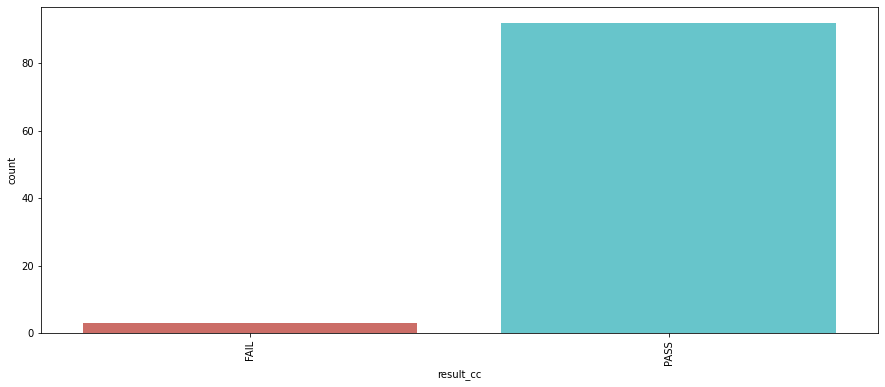

In [77]:
plt.figure(figsize=(15,6))
sns.countplot('result_cc', data = cc_marks, palette='hls')
plt.xticks(rotation = 90)
plt.show()

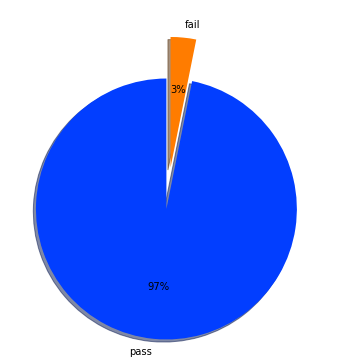

In [78]:
plt.figure(figsize=(15,6))
colors = sns.color_palette('bright')
explode = [0.3, 0.02]
plt.pie(cc_marks['result_cc'].value_counts(), colors = colors, labels = ['pass', 'fail'],
        explode = explode, autopct = '%0.0f%%', shadow = 'True', startangle = 90)
plt.show()

In [79]:
cc_marks['percentage'] = cc_marks['total_marks_cc'].div(100).round(2)

In [80]:
conditions = [
    (cc_marks['percentage'] > 0.7),
    (cc_marks['percentage'] >= 0.5) & (cc_marks['percentage'] < 0.69),
    (cc_marks['percentage'] >= 0.35) & (cc_marks['percentage'] < 0.49),
    (cc_marks['percentage'] < 0.35)
]

values = [0, 1, 2, 3]

cc_marks['time_per_day'] = np.select(conditions, values)


In [81]:
data2 = ['result_cc']
for i in data2:
    cc_marks[i] = le.fit_transform(cc_marks[i])

In [82]:
x_cc= cc_marks.drop(['enrollment_number', 'student_name', 'total_marks_cc',
                   'time_per_day', 'result_cc', 'internal_marks_cc',
                   'external_marks_cc'], axis = 1)  
y_cc= cc_marks['time_per_day']

In [83]:
x_train_cc = x_cc.iloc[:75]

In [84]:
y_train_cc = y_cc.iloc[:75]

In [85]:
x_test_cc = x_cc.iloc[75:96]

In [86]:
y_test_cc = y_cc.iloc[75:96]

In [87]:
svregressor.fit(x_train_cc, y_train_cc)

SVR()

In [88]:
print("Training Accuracy :", svregressor.score(x_train_cc, y_train_cc))
print("Testing Accuracy :", svregressor.score(x_test_cc, y_test_cc))

Training Accuracy : 0.8191074860522307
Testing Accuracy : 0.5615379933181904


In [89]:
liregressor.fit(x_train_cc, y_train_cc)

LinearRegression()

In [90]:
print("Training Accuracy :", liregressor.score(x_train_cc, y_train_cc))
print("Testing Accuracy :", liregressor.score(x_test_cc, y_test_cc))

Training Accuracy : 0.6472684553059114
Testing Accuracy : 0.34903085007601853


In [91]:
loregressor.fit(x_train_cc, y_train_cc)

LogisticRegression()

In [92]:
print("Training Accuracy :", loregressor.score(x_train_cc, y_train_cc))
print("Testing Accuracy :", loregressor.score(x_test_cc, y_test_cc))

Training Accuracy : 0.7066666666666667
Testing Accuracy : 0.7


In [93]:
dtregressor.fit(x_train_cc, y_train_cc)

DecisionTreeRegressor()

In [94]:
print("Training Accuracy :", dtregressor.score(x_train_cc, y_train_cc))
print("Testing Accuracy :", dtregressor.score(x_test_cc, y_test_cc))

Training Accuracy : 1.0
Testing Accuracy : 1.0


In [95]:
rfregressor.fit(x_train_cc, y_train_cc)

RandomForestRegressor()

In [96]:
print("Training Accuracy :", rfregressor.score(x_train_cc, y_train_cc))
print("Testing Accuracy :", rfregressor.score(x_test_cc, y_test_cc))

Training Accuracy : 0.9759409090909091
Testing Accuracy : 0.951595238095238


In [97]:
cross_val_score(SVR(),x_cc, y_cc, cv = 3)

array([-0.04365036,  0.8671829 ,  0.62998338])

In [98]:
cross_val_score(LinearRegression(),x_cc, y_cc, cv = 3)

array([0.62957117, 0.61755795, 0.33338199])

In [99]:
cross_val_score(LogisticRegression(),x_cc, y_cc, cv = 3)

array([0.6875    , 0.6875    , 0.74193548])

In [100]:
cross_val_score(DecisionTreeRegressor(),x_cc, y_cc, cv = 3)

array([-0.43157895,  1.        ,  1.        ])

In [101]:
cross_val_score(RandomForestRegressor(),x_cc, y_cc, cv = 3)

array([-0.07990737,  0.99093333,  0.97398214])

In [102]:
def time_predict_cc(percentage):
    x=np.zeros(len(x_cc.columns))
    x[0]=percentage
    return svregressor.predict([x])[0]

In [103]:
time_predict_cc(0.55)

0.9000715547988563

In [104]:
def time_predict_cc(percentage):
    x=np.zeros(len(x_cc.columns))
    x[0]=percentage
    return liregressor.predict([x])[0]

In [105]:
time_predict_cc(0.55)

1.148979775589218

In [106]:
def time_predict_cc(percentage):
    x=np.zeros(len(x_cc.columns))
    x[0]=percentage
    return loregressor.predict([x])[0]

In [107]:
time_predict_cc(0.55)

1

In [108]:
def time_predict_cc(percentage):
    x=np.zeros(len(x_cc.columns))
    x[0]=percentage
    return dtregressor.predict([x])[0]

In [109]:
time_predict_cc(0.55)

1.0

In [110]:
def time_predict_cc(percentage):
    x=np.zeros(len(x_cc.columns))
    x[0]=percentage
    return rfregressor.predict([x])[0]

In [111]:
time_predict_cc(0.14)

2.53

In [112]:
aca_marks = pd.read_csv('aca_marks.csv')

In [113]:
aca_marks.head()

,enrollment_number,student_name,internal_marks_aca,external_marks_aca,total_marks_aca,result_aca
0,1KG16CS025,DIVYA R D,24,21,45,PASS
1,1KG16CS054,M D MAHATAP PASHA,32,30,62,PASS
2,1KG16CS059,P YASHWANTH,25,26,51,PASS
3,1KG16CS113,V CHANDANA CHOWDARY,28,23,51,PASS
4,1KG17CS002,ABHIMANYU BANSAL,37,29,66,PASS


In [114]:
aca_marks.tail()

,enrollment_number,student_name,internal_marks_aca,external_marks_aca,total_marks_aca,result_aca
90,1KG17CS106,VIKAS B,37,30,67,PASS
91,1KG17CS107,VINITH RAJ B U,32,28,60,PASS
92,1KG17CS108,VINOD N,32,21,53,PASS
93,1KG17CS109,YASH KUMAR SINGH PATWA,37,29,66,PASS
94,1KG17CS110,YASHASH T V,38,26,64,PASS


In [115]:
aca_marks.shape

(95, 6)

In [116]:
aca_marks.columns

Index(['enrollment_number', 'student_name', 'internal_marks_aca',
       'external_marks_aca', 'total_marks_aca', 'result_aca'],
      dtype='object')

In [117]:
aca_marks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   enrollment_number   95 non-null     object
 1   student_name        95 non-null     object
 2   internal_marks_aca  95 non-null     int64 
 3   external_marks_aca  95 non-null     int64 
 4   total_marks_aca     95 non-null     int64 
 5   result_aca          95 non-null     object
dtypes: int64(3), object(3)
memory usage: 4.6+ KB


In [118]:
aca_marks.describe()

,internal_marks_aca,external_marks_aca,total_marks_aca
count,95.000000,95.000000,95.000000
mean,35.936842,28.231579,64.168421
std,3.634382,6.691456,8.896153
min,24.000000,0.000000,33.000000
25%,34.000000,24.000000,61.000000
50%,37.000000,29.000000,65.000000
75%,38.000000,32.000000,71.000000
max,40.000000,45.000000,85.000000


In [119]:
aca_marks.isnull().sum()

enrollment_number     0
student_name          0
internal_marks_aca    0
external_marks_aca    0
total_marks_aca       0
result_aca            0
dtype: int64

In [120]:
aca_marks['result_aca'].unique()

array(['PASS', 'FAIL'], dtype=object)

In [121]:
aca_marks['result_aca'].value_counts()

PASS    91
FAIL     4
Name: result_aca, dtype: int64

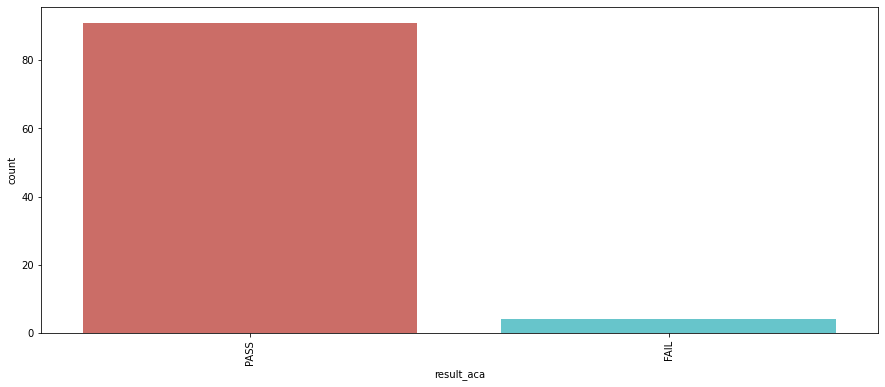

In [122]:
plt.figure(figsize=(15,6))
sns.countplot('result_aca', data = aca_marks, palette='hls')
plt.xticks(rotation = 90)
plt.show()

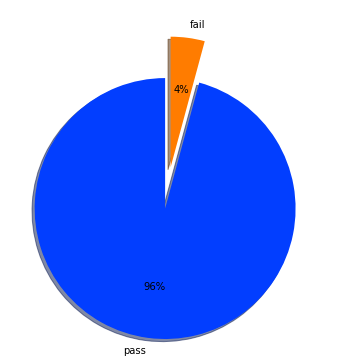

In [123]:
plt.figure(figsize=(15,6))
colors = sns.color_palette('bright')
explode = [0.3, 0.02]
plt.pie(aca_marks['result_aca'].value_counts(), colors = colors, labels = ['pass', 'fail'],
        explode = explode, autopct = '%0.0f%%', shadow = 'True', startangle = 90)
plt.show()

In [124]:
aca_marks['percentage'] = aca_marks['total_marks_aca'].div(100).round(2)

In [125]:
conditions = [
    (aca_marks['percentage'] > 0.7),
    (aca_marks['percentage'] >= 0.5) & (aca_marks['percentage'] < 0.69),
    (aca_marks['percentage'] >= 0.35) & (aca_marks['percentage'] < 0.49),
    (aca_marks['percentage'] < 0.35)
]

values = [0, 1, 2, 3]

aca_marks['time_per_day'] = np.select(conditions, values)

In [126]:
data3 = ['result_aca']
for i in data3:
    aca_marks[i] = le.fit_transform(aca_marks[i])

In [127]:
x_aca= aca_marks.drop(['enrollment_number', 'student_name', 'total_marks_aca',
                   'time_per_day', 'result_aca', 'internal_marks_aca',
                   'external_marks_aca'], axis = 1)  
y_aca= aca_marks['time_per_day']

In [128]:
x_train_aca = x_aca.iloc[:75]

In [129]:
y_train_aca = y_aca.iloc[:75]

In [130]:
x_test_aca = x_aca.iloc[75:96]

In [131]:
y_test_aca = y_aca.iloc[75:96]

In [132]:
svregressor.fit(x_train_aca, y_train_aca)

SVR()

In [133]:
print("Training Accuracy :", svregressor.score(x_train_aca, y_train_aca))
print("Testing Accuracy :", svregressor.score(x_test_aca, y_test_aca))

Training Accuracy : 0.8906471395359261
Testing Accuracy : 0.5516215081384374


In [134]:
liregressor.fit(x_train_aca, y_train_aca)

LinearRegression()

In [135]:
print("Training Accuracy :", liregressor.score(x_train_aca, y_train_aca))
print("Testing Accuracy :", liregressor.score(x_test_aca, y_test_aca))

Training Accuracy : 0.7294414251997658
Testing Accuracy : 0.21241987461919887


In [136]:
loregressor.fit(x_train_aca, y_train_aca)

LogisticRegression()

In [137]:
print("Training Accuracy :", loregressor.score(x_train_aca, y_train_aca))
print("Testing Accuracy :", loregressor.score(x_test_aca, y_test_aca))

Training Accuracy : 0.6266666666666667
Testing Accuracy : 0.7


In [138]:
dtregressor.fit(x_train_aca, y_train_aca)

DecisionTreeRegressor()

In [139]:
print("Training Accuracy :", dtregressor.score(x_train_aca, y_train_aca))
print("Testing Accuracy :", dtregressor.score(x_test_aca, y_test_aca))

Training Accuracy : 1.0
Testing Accuracy : 0.8076923076923077


In [140]:
rfregressor.fit(x_train_aca, y_train_aca)

RandomForestRegressor()

In [141]:
print("Training Accuracy :", rfregressor.score(x_train_aca, y_train_aca))
print("Testing Accuracy :", rfregressor.score(x_test_aca, y_test_aca))

Training Accuracy : 0.9870942066805846
Testing Accuracy : 0.7748269230769231


In [142]:
cross_val_score(SVR(),x_aca, y_aca, cv = 3)

array([0.86987713, 0.65006984, 0.66651966])

In [143]:
cross_val_score(LinearRegression(),x_aca, y_aca, cv = 3)

array([0.53716731, 0.765092  , 0.36500143])

In [144]:
cross_val_score(LogisticRegression(),x_aca, y_aca, cv = 3)

array([0.625     , 0.625     , 0.64516129])

In [145]:
cross_val_score(DecisionTreeRegressor(),x_aca, y_aca, cv = 3)

array([1.        , 0.93429158, 0.88076923])

In [146]:
cross_val_score(RandomForestRegressor(),x_aca, y_aca, cv = 3)

array([0.96414545, 0.87657331, 0.85965346])

In [147]:
def time_predict_aca(percentage):
    x=np.zeros(len(x_aca.columns))
    x[0]=percentage
    return svregressor.predict([x])[0]

In [148]:
time_predict_aca(0.45)

1.6984273729112682

In [149]:
def time_predict_aca(percentage):
    x=np.zeros(len(x_aca.columns))
    x[0]=percentage
    return liregressor.predict([x])[0]

In [150]:
time_predict_aca(0.45)

1.800630059105957

In [151]:
def time_predict_aca(percentage):
    x=np.zeros(len(x_aca.columns))
    x[0]=percentage
    return loregressor.predict([x])[0]

In [152]:
time_predict_aca(0.45)

1

In [153]:
def time_predict_aca(percentage):
    x=np.zeros(len(x_aca.columns))
    x[0]=percentage
    return dtregressor.predict([x])[0]

In [154]:
time_predict_aca(0.45)

2.0

In [155]:
def time_predict_aca(percentage):
    x=np.zeros(len(x_aca.columns))
    x[0]=percentage
    return rfregressor.predict([x])[0]

In [156]:
time_predict_aca(0.45)

1.8

In [157]:
ml_marks = pd.read_csv('ml_marks.csv')

In [158]:
ml_marks.head()

,enrollment_number,student_name,internal_marks_ml,external_marks_ml,total_marks_ml,result_ml
0,1KG16CS025,DIVYA R D,19,9,28,FAIL
1,1KG16CS054,M D MAHATAP PASHA,30,29,59,PASS
2,1KG16CS059,P YASHWANTH,21,26,47,PASS
3,1KG16CS113,V CHANDANA CHOWDARY,27,21,48,PASS
4,1KG17CS002,ABHIMANYU BANSAL,28,21,49,PASS


In [159]:
ml_marks.tail()

,enrollment_number,student_name,internal_marks_ml,external_marks_ml,total_marks_ml,result_ml
90,1KG17CS106,VIKAS B,35,27,62,PASS
91,1KG17CS107,VINITH RAJ B U,33,25,58,PASS
92,1KG17CS108,VINOD N,31,22,53,PASS
93,1KG17CS109,YASH KUMAR SINGH PATWA,37,33,70,PASS
94,1KG17CS110,YASHASH T V,28,27,55,PASS


In [160]:
ml_marks.shape

(95, 6)

In [161]:
ml_marks.columns

Index(['enrollment_number', 'student_name', 'internal_marks_ml',
       'external_marks_ml', 'total_marks_ml', 'result_ml'],
      dtype='object')

In [162]:
ml_marks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   enrollment_number  95 non-null     object
 1   student_name       95 non-null     object
 2   internal_marks_ml  95 non-null     int64 
 3   external_marks_ml  95 non-null     int64 
 4   total_marks_ml     95 non-null     int64 
 5   result_ml          95 non-null     object
dtypes: int64(3), object(3)
memory usage: 4.6+ KB


In [163]:
ml_marks.describe()

,internal_marks_ml,external_marks_ml,total_marks_ml
count,95.000000,95.000000,95.000000
mean,32.442105,28.421053,60.863158
std,3.811282,7.701311,9.767086
min,19.000000,0.000000,28.000000
25%,31.000000,23.000000,54.000000
50%,33.000000,27.000000,60.000000
75%,35.000000,33.500000,68.000000
max,39.000000,45.000000,82.000000


In [164]:
ml_marks.isnull().sum()

enrollment_number    0
student_name         0
internal_marks_ml    0
external_marks_ml    0
total_marks_ml       0
result_ml            0
dtype: int64

In [165]:
ml_marks['result_ml'].unique()

array(['FAIL', 'PASS'], dtype=object)

In [166]:
ml_marks['result_ml'].value_counts()

PASS    90
FAIL     5
Name: result_ml, dtype: int64

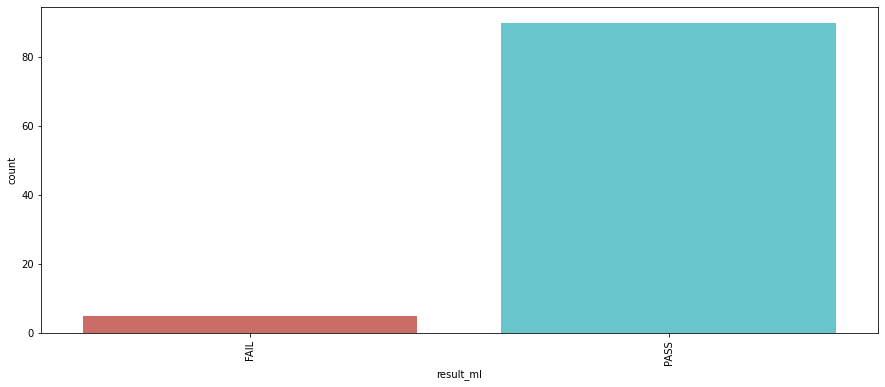

In [167]:
plt.figure(figsize=(15,6))
sns.countplot('result_ml', data = ml_marks, palette='hls')
plt.xticks(rotation = 90)
plt.show()

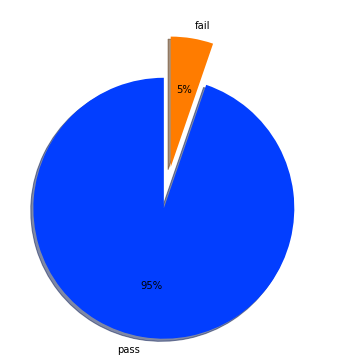

In [168]:
plt.figure(figsize=(15,6))
colors = sns.color_palette('bright')
explode = [0.3, 0.02]
plt.pie(ml_marks['result_ml'].value_counts(), colors = colors, labels = ['pass', 'fail'],
        explode = explode, autopct = '%0.0f%%', shadow = 'True', startangle = 90)
plt.show()

In [169]:
ml_marks['percentage'] = ml_marks['total_marks_ml'].div(100).round(2)

In [170]:
conditions = [
    (ml_marks['percentage'] > 0.7),
    (ml_marks['percentage'] >= 0.5) & (ml_marks['percentage'] < 0.69),
    (ml_marks['percentage'] >= 0.35) & (ml_marks['percentage'] < 0.49),
    (ml_marks['percentage'] < 0.35)
]

values = [0, 1, 2, 3]

ml_marks['time_per_day'] = np.select(conditions, values)

In [171]:
data4 = ['result_ml']
for i in data4:
    ml_marks[i] = le.fit_transform(ml_marks[i])

In [172]:
x_ml= ml_marks.drop(['enrollment_number', 'student_name', 'total_marks_ml',
                   'time_per_day', 'result_ml', 'internal_marks_ml',
                   'external_marks_ml'], axis = 1)  
y_ml= ml_marks['time_per_day']

In [173]:
x_train_ml = x_ml.iloc[:75]

In [174]:
y_train_ml = y_ml.iloc[:75]

In [175]:
x_test_ml = x_ml.iloc[75:96]

In [176]:
y_test_ml = y_ml.iloc[75:96]

In [177]:
svregressor.fit(x_train_ml, y_train_ml)

SVR()

In [178]:
print("Training Accuracy :", svregressor.score(x_train_ml, y_train_ml))
print("Testing Accuracy :", svregressor.score(x_test_ml, y_test_ml))

Training Accuracy : 0.7820455675583629
Testing Accuracy : 0.2909533961533832


In [179]:
liregressor.fit(x_train_ml, y_train_ml)

LinearRegression()

In [180]:
print("Training Accuracy :", liregressor.score(x_train_ml, y_train_ml))
print("Testing Accuracy :", liregressor.score(x_test_ml, y_test_ml))

Training Accuracy : 0.6733999367595538
Testing Accuracy : -0.05018158800590622


In [181]:
loregressor.fit(x_train_ml, y_train_ml)

LogisticRegression()

In [182]:
print("Training Accuracy :", loregressor.score(x_train_ml, y_train_ml))
print("Testing Accuracy :", loregressor.score(x_test_ml, y_test_ml))

Training Accuracy : 0.64
Testing Accuracy : 0.75


In [183]:
dtregressor.fit(x_train_ml, y_train_ml)

DecisionTreeRegressor()

In [184]:
print("Training Accuracy :", dtregressor.score(x_train_ml, y_train_ml))
print("Testing Accuracy :", dtregressor.score(x_test_ml, y_test_ml))

Training Accuracy : 1.0
Testing Accuracy : 1.0


In [185]:
rfregressor.fit(x_train_ml, y_train_ml)

RandomForestRegressor()

In [186]:
print("Training Accuracy :", rfregressor.score(x_train_ml, y_train_ml))
print("Testing Accuracy :", rfregressor.score(x_test_ml, y_test_ml))

Training Accuracy : 0.9922546728971963
Testing Accuracy : 0.9931733333333334


In [187]:

cross_val_score(SVR(),x_cc, y_cc, cv = 3)

array([-0.04365036,  0.8671829 ,  0.62998338])

In [188]:
cross_val_score(LinearRegression(),x_cc, y_cc, cv = 3)

array([0.62957117, 0.61755795, 0.33338199])

In [189]:
cross_val_score(LogisticRegression(),x_cc, y_cc, cv = 3)

array([0.6875    , 0.6875    , 0.74193548])

In [190]:
cross_val_score(DecisionTreeRegressor(),x_cc, y_cc, cv = 3)

array([-0.43157895,  1.        ,  1.        ])

In [191]:
cross_val_score(RandomForestRegressor(),x_cc, y_cc, cv = 3)

array([0.01203368, 0.99785333, 0.9694244 ])

In [192]:
def time_predict_ml(percentage):
    x=np.zeros(len(x_ml.columns))
    x[0]=percentage
    return svregressor.predict([x])[0]

In [193]:
time_predict_ml(0.31)

2.9390560044665044

In [194]:
time_predict_ml(0.65)

0.997331691267451

In [195]:
time_predict_ml(0.48)

1.5416550966986122

In [196]:
time_predict_ml(0.80)

0.03194557656093977

In [197]:
def time_predict_ml(percentage):
    x=np.zeros(len(x_ml.columns))
    x[0]=percentage
    return liregressor.predict([x])[0]

In [198]:
time_predict_ml(0.31)

2.4162024480795474

In [199]:
def time_predict_ml(percentage):
    x=np.zeros(len(x_ml.columns))
    x[0]=percentage
    return loregressor.predict([x])[0]

In [200]:
time_predict_ml(0.31)

1

In [201]:
def time_predict_ml(percentage):
    x=np.zeros(len(x_ml.columns))
    x[0]=percentage
    return dtregressor.predict([x])[0]

In [202]:
time_predict_ml(0.31)

3.0

In [203]:
def time_predict_ml(percentage):
    x=np.zeros(len(x_ml.columns))
    x[0]=percentage
    return rfregressor.predict([x])[0]

In [204]:
time_predict_ml(0.31)

2.85

In [205]:
san_marks = pd.read_csv('san_marks.csv')

In [206]:
san_marks.head()

,enrollment_number,student_name,internal_marks_san,external_marks_san,total_marks_san,result_san
0,1KG16CS025,DIVYA R D,25,21,46,PASS
1,1KG16CS054,M D MAHATAP PASHA,34,26,60,PASS
2,1KG16CS059,P YASHWANTH,33,32,65,PASS
3,1KG16CS113,V CHANDANA CHOWDARY,29,37,66,PASS
4,1KG17CS002,ABHIMANYU BANSAL,38,29,67,PASS


In [207]:
san_marks.tail()

,enrollment_number,student_name,internal_marks_san,external_marks_san,total_marks_san,result_san
90,1KG17CS106,VIKAS B,35,47,82,PASS
91,1KG17CS107,VINITH RAJ B U,32,32,64,PASS
92,1KG17CS108,VINOD N,30,29,59,PASS
93,1KG17CS109,YASH KUMAR SINGH PATWA,38,45,83,PASS
94,1KG17CS110,YASHASH T V,35,51,86,PASS


In [208]:
san_marks.shape

(95, 6)

In [209]:
san_marks.columns

Index(['enrollment_number', 'student_name', 'internal_marks_san',
       'external_marks_san', 'total_marks_san', 'result_san'],
      dtype='object')

In [210]:
san_marks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   enrollment_number   95 non-null     object
 1   student_name        95 non-null     object
 2   internal_marks_san  95 non-null     int64 
 3   external_marks_san  95 non-null     int64 
 4   total_marks_san     95 non-null     int64 
 5   result_san          95 non-null     object
dtypes: int64(3), object(3)
memory usage: 4.6+ KB


In [211]:
san_marks.describe()

,internal_marks_san,external_marks_san,total_marks_san
count,95.000000,95.000000,95.000000
mean,34.610526,33.715789,68.326316
std,4.000784,6.975128,9.403985
min,25.000000,21.000000,46.000000
25%,31.000000,29.000000,61.000000
50%,35.000000,33.000000,67.000000
75%,38.000000,38.000000,75.000000
max,40.000000,51.000000,89.000000


In [212]:
san_marks.isnull().sum()

enrollment_number     0
student_name          0
internal_marks_san    0
external_marks_san    0
total_marks_san       0
result_san            0
dtype: int64

In [213]:
san_marks['percentage'] = san_marks['total_marks_san'].div(100).round(2)

In [214]:
conditions = [
    (san_marks['percentage'] > 0.7),
    (san_marks['percentage'] >= 0.5) & (san_marks['percentage'] < 0.69),
    (san_marks['percentage'] >= 0.35) & (san_marks['percentage'] < 0.49),
    (san_marks['percentage'] < 0.35)
]

values = [0, 1, 2, 3]

san_marks['time_per_day'] = np.select(conditions, values)

In [215]:
data5 = ['result_san']
for i in data5:
    san_marks[i] = le.fit_transform(san_marks[i])

In [216]:
x_san= san_marks.drop(['enrollment_number', 'student_name', 'total_marks_san',
                   'time_per_day', 'result_san', 'internal_marks_san',
                   'external_marks_san'], axis = 1)  
y_san= san_marks['time_per_day']

In [217]:
x_train_san = x_san.iloc[:75]

In [218]:
y_train_san = y_san.iloc[:75]

In [219]:
x_test_san = x_san.iloc[75:96]

In [220]:
y_test_san = y_san.iloc[75:96]

In [221]:
svregressor.fit(x_train_san, y_train_san)

SVR()

In [222]:
print("Training Accuracy :", svregressor.score(x_train_san, y_train_san))
print("Testing Accuracy :", svregressor.score(x_test_san, y_test_san))

Training Accuracy : 0.7988921069807298
Testing Accuracy : 0.842647443231614


In [223]:
liregressor.fit(x_train_san, y_train_san)

LinearRegression()

In [224]:
print("Training Accuracy :", liregressor.score(x_train_san, y_train_san))
print("Testing Accuracy :", liregressor.score(x_test_san, y_test_san))

Training Accuracy : 0.6070488681409869
Testing Accuracy : 0.660300952346401


In [225]:
loregressor.fit(x_train_san, y_train_san)

LogisticRegression()

In [226]:
print("Training Accuracy :", loregressor.score(x_train_san, y_train_san))
print("Testing Accuracy :", loregressor.score(x_test_san, y_test_san))

Training Accuracy : 0.92
Testing Accuracy : 0.9


In [227]:
dtregressor.fit(x_train_san, y_train_san)

DecisionTreeRegressor()

In [228]:
print("Training Accuracy :", dtregressor.score(x_train_san, y_train_san))
print("Testing Accuracy :", dtregressor.score(x_test_san, y_test_san))

Training Accuracy : 1.0
Testing Accuracy : 1.0


In [229]:
rfregressor.fit(x_train_san, y_train_san)

RandomForestRegressor()

In [230]:
print("Training Accuracy :", rfregressor.score(x_train_san, y_train_san))
print("Testing Accuracy :", rfregressor.score(x_test_san, y_test_san))

Training Accuracy : 0.9652870967741936
Testing Accuracy : 0.9910909090909091


In [231]:
cross_val_score(SVR(),x_san, y_san, cv = 3)

array([0.72902299, 0.86854401, 0.59256834])

In [232]:
cross_val_score(LinearRegression(),x_san, y_san, cv = 3)

array([0.73114852, 0.64478285, 0.33568649])

In [233]:
cross_val_score(LogisticRegression(),x_san, y_san, cv = 3)

array([0.84375   , 0.9375    , 0.80645161])

In [234]:
cross_val_score(DecisionTreeRegressor(),x_san, y_san, cv = 3)

array([0.57894737, 1.        , 0.8697479 ])

In [235]:
cross_val_score(RandomForestRegressor(),x_san, y_san, cv = 3)

array([0.72713684, 0.99894603, 0.78250504])

In [236]:
def time_predict_san(percentage):
    x=np.zeros(len(x_san.columns))
    x[0]=percentage
    return svregressor.predict([x])[0]

In [237]:
time_predict_san(0.48)

0.9524553926066414

In [238]:
def time_predict_san(percentage):
    x=np.zeros(len(x_san.columns))
    x[0]=percentage
    return liregressor.predict([x])[0]

In [239]:
time_predict_san(0.48)

1.4321717741108948

In [240]:
def time_predict_san(percentage):
    x=np.zeros(len(x_san.columns))
    x[0]=percentage
    return loregressor.predict([x])[0]

In [241]:
time_predict_san(0.48)

1

In [242]:
def time_predict_san(percentage):
    x=np.zeros(len(x_san.columns))
    x[0]=percentage
    return dtregressor.predict([x])[0]

In [243]:
time_predict_san(0.48)

0.0

In [244]:
def time_predict_san(percentage):
    x=np.zeros(len(x_san.columns))
    x[0]=percentage
    return rfregressor.predict([x])[0]

In [245]:
time_predict_san(0.48)

0.55

In [246]:
cc_marks.to_csv('cc_marks1.csv')

In [247]:
result = pd.read_csv('result.csv')

In [248]:
final_result = result[['roll_num','name','web_total', 'cc_total', 'aca_total',
                      'ml_total', 'san_total', 'ml_lab_total', 'wta_lab_total',
                      'csp_lab_total', 'overall_total', 'overall_result']].copy()

In [249]:
final_result.head()

,roll_num,name,web_total,cc_total,aca_total,ml_total,san_total,ml_lab_total,wta_lab_total,csp_lab_total,overall_total,overall_result
0,1KG16CS025,DIVYA R D,32,42,45,28,46,54,82,83,412,FAIL
1,1KG16CS054,M D MAHATAP PASHA,67,57,62,59,60,50,98,90,543,PASS
2,1KG16CS059,P YASHWANTH,35,44,51,47,65,47,70,93,452,FAIL
3,1KG16CS113,V CHANDANA CHOWDARY,54,54,51,48,66,81,77,93,524,PASS
4,1KG17CS002,ABHIMANYU BANSAL,60,57,66,49,67,91,77,91,558,PASS


In [250]:
final_result.tail()

,roll_num,name,web_total,cc_total,aca_total,ml_total,san_total,ml_lab_total,wta_lab_total,csp_lab_total,overall_total,overall_result
90,1KG17CS106,VIKAS B,61,62,67,62,82,84,97,93,608,PASS
91,1KG17CS107,VINITH RAJ B U,52,63,60,58,64,73,93,92,555,PASS
92,1KG17CS108,VINOD N,60,51,53,53,59,63,91,80,510,PASS
93,1KG17CS109,YASH KUMAR SINGH PATWA,68,61,66,70,83,87,98,93,626,PASS
94,1KG17CS110,YASHASH T V,71,59,64,55,86,90,87,94,606,PASS


In [251]:
final_result.shape

(95, 12)

In [252]:

final_result.columns

Index(['roll_num', 'name', 'web_total', 'cc_total', 'aca_total', 'ml_total',
       'san_total', 'ml_lab_total', 'wta_lab_total', 'csp_lab_total',
       'overall_total', 'overall_result'],
      dtype='object')

In [253]:
final_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   roll_num        95 non-null     object
 1   name            95 non-null     object
 2   web_total       95 non-null     int64 
 3   cc_total        95 non-null     int64 
 4   aca_total       95 non-null     int64 
 5   ml_total        95 non-null     int64 
 6   san_total       95 non-null     int64 
 7   ml_lab_total    95 non-null     int64 
 8   wta_lab_total   95 non-null     int64 
 9   csp_lab_total   95 non-null     int64 
 10  overall_total   95 non-null     int64 
 11  overall_result  95 non-null     object
dtypes: int64(9), object(3)
memory usage: 9.0+ KB


In [254]:
final_result.describe()

,web_total,cc_total,aca_total,ml_total,san_total,ml_lab_total,wta_lab_total,csp_lab_total,overall_total
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,66.347368,62.378947,64.168421,60.863158,68.326316,72.631579,87.252632,91.326316,573.294737
std,13.032503,9.045016,8.896153,9.767086,9.403985,13.931483,11.565694,4.183153,57.623480
min,32.000000,27.000000,33.000000,28.000000,46.000000,24.000000,54.000000,80.000000,412.000000
25%,59.000000,57.000000,61.000000,54.000000,61.000000,64.500000,80.000000,90.000000,546.000000
50%,66.000000,61.000000,65.000000,60.000000,67.000000,74.000000,93.000000,91.000000,572.000000
75%,75.500000,68.000000,71.000000,68.000000,75.000000,83.000000,96.000000,94.000000,613.000000
max,92.000000,86.000000,85.000000,82.000000,89.000000,97.000000,99.000000,98.000000,717.000000


In [255]:
final_result.isnull().sum()

roll_num          0
name              0
web_total         0
cc_total          0
aca_total         0
ml_total          0
san_total         0
ml_lab_total      0
wta_lab_total     0
csp_lab_total     0
overall_total     0
overall_result    0
dtype: int64

In [256]:
final_result['overall_result'].unique()

array(['FAIL', 'PASS'], dtype=object)

In [257]:
final_result['overall_result'].value_counts()

PASS    83
FAIL    12
Name: overall_result, dtype: int64

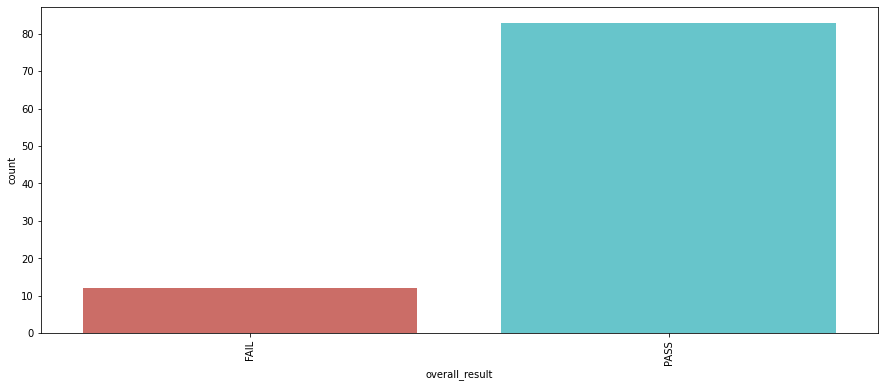

In [258]:
plt.figure(figsize=(15,6))
sns.countplot('overall_result', data = final_result, palette='hls')
plt.xticks(rotation = 90)
plt.show()

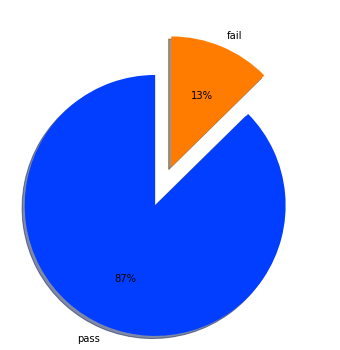

In [259]:
plt.figure(figsize=(15,6))
colors = sns.color_palette('bright')
explode = [0.3, 0.02]
plt.pie(final_result['overall_result'].value_counts(), colors = colors, labels = ['pass', 'fail'],
        explode = explode, autopct = '%0.0f%%', shadow = 'True', startangle = 90)
plt.show()

In [260]:
final_result['percentage'] = final_result['overall_total'].div(1000).round(2)

In [261]:
conditions = [
    (final_result['percentage'] > 0.7),
    (final_result['percentage'] >= 0.5) & (final_result['percentage'] < 0.69),
    (final_result['percentage'] >= 0.35) & (final_result['percentage'] < 0.49),
    (final_result['percentage'] < 0.35)
]

values = [0, 1, 2, 3]

final_result['time_per_day'] = np.select(conditions, values)

In [262]:
data5 = ['overall_result']
for i in data5:
    final_result[i] = le.fit_transform(final_result[i])

In [263]:
x_final = final_result.drop(['roll_num', 'name', 'web_total', 'cc_total', 'aca_total', 'ml_total',
       'san_total', 'ml_lab_total', 'wta_lab_total', 'csp_lab_total',
       'overall_total', 'overall_result', 'time_per_day'], axis = 1)
y_final = final_result['time_per_day']

In [264]:
x_train_final = x_final.iloc[:75]

In [265]:
y_train_final = y_final.iloc[:75]

In [266]:
x_test_final = x_final.iloc[75:96]

In [267]:
y_test_final = y_final.iloc[75:96]

In [268]:
svregressor.fit(x_train_final, y_train_final)

SVR()

In [269]:
print("Training Accuracy :", svregressor.score(x_train_final, y_train_final))
print("Testing Accuracy :", svregressor.score(x_test_final, y_test_final))

Training Accuracy : 0.8658649189804309
Testing Accuracy : 0.9572683866520322


In [270]:
liregressor.fit(x_train_final, y_train_final)

LinearRegression()

In [271]:
print("Training Accuracy :", liregressor.score(x_train_final, y_train_final))
print("Testing Accuracy :", liregressor.score(x_test_final, y_test_final))

Training Accuracy : 0.46760708401976936
Testing Accuracy : 0.5370927333256148


In [272]:
loregressor.fit(x_train_final, y_train_final)

LogisticRegression()

In [273]:
print("Training Accuracy :", loregressor.score(x_train_final, y_train_final))
print("Testing Accuracy :", loregressor.score(x_test_final, y_test_final))

Training Accuracy : 0.9066666666666666
Testing Accuracy : 0.85


In [274]:

dtregressor.fit(x_train_final, y_train_final)

DecisionTreeRegressor()

In [275]:
print("Training Accuracy :", dtregressor.score(x_train_final, y_train_final))
print("Testing Accuracy :", dtregressor.score(x_test_final, y_test_final))

Training Accuracy : 1.0
Testing Accuracy : 1.0


In [276]:
rfregressor.fit(x_train_final, y_train_final)

RandomForestRegressor()

In [277]:
print("Training Accuracy :", rfregressor.score(x_train_final, y_train_final))
print("Testing Accuracy :", rfregressor.score(x_test_final, y_test_final))

Training Accuracy : 0.98008
Testing Accuracy : 1.0


In [278]:
cross_val_score(SVR(),x_final, y_final, cv = 3)

array([0.8877061 , 0.40950956, 0.92468941])

In [279]:
cross_val_score(LinearRegression(),x_final, y_final, cv = 3)

array([0.44711267, 0.51389774, 0.47703726])

In [280]:
cross_val_score(LogisticRegression(),x_final, y_final, cv = 3)

array([0.90625   , 0.875     , 0.90322581])

In [281]:
cross_val_score(DecisionTreeRegressor(),x_final, y_final, cv = 3)

array([1.        , 0.66315789, 1.        ])

In [282]:
cross_val_score(RandomForestRegressor(),x_final, y_final, cv = 3)

array([0.99996322, 0.66312421, 0.99979907])

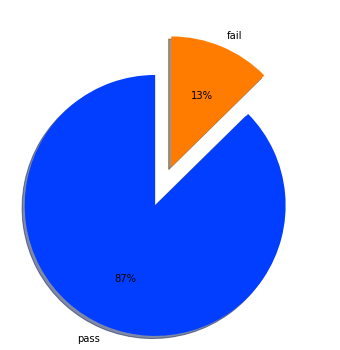

In [283]:
plt.figure(figsize=(15,6))
colors = sns.color_palette('bright')
explode = [0.3, 0.02]
plt.pie(final_result['overall_result'].value_counts(), colors = colors, labels = ['pass', 'fail'],
        explode = explode, autopct = '%0.0f%%', shadow = 'True', startangle = 90)
plt.show()

In [284]:

def time_predict_final(percentage):
    x=np.zeros(len(x_final.columns))
    x[0]=percentage
    return svregressor.predict([x])[0]

In [285]:
time_predict_final(0.47)

1.9204777988758948

In [286]:
def time_predict_final(percentage):
    x=np.zeros(len(x_final.columns))
    x[0]=percentage
    return liregressor.predict([x])[0]

In [287]:
time_predict_final(0.47)

1.446485447556288

In [288]:
def time_predict_final(percentage):
    x=np.zeros(len(x_final.columns))
    x[0]=percentage
    return loregressor.predict([x])[0]

In [289]:
time_predict_final(0.47)

1

In [290]:
def time_predict_final(percentage):
    x=np.zeros(len(x_final.columns))
    x[0]=percentage
    return dtregressor.predict([x])[0]

In [291]:
time_predict_final(0.47)

2.0

In [292]:
def time_predict_final(percentage):
    x=np.zeros(len(x_final.columns))
    x[0]=percentage
    return rfregressor.predict([x])[0]

In [293]:
time_predict_final(0.47)

2.0